## Introduction

This readme includes an example of how the functions inside the file “estimators.py” can be employed for frequency estimation. <br> The estimators inside the file are 
* PUMA: [can be found at <a href="https://ieeexplore.ieee.org/abstract/document/5621931" target="_blank">this link</a>] 
* Unitary_PUMA: [can be found at <a href="https://ieeexplore.ieee.org/abstract/document/7152983" target="_blank">this link</a>]
* DFT_WLS: [can be found at <a href="https://ieeexplore.ieee.org/abstract/document/9576712" target="_blank">this link</a>]
* A&M estimator: [can be found at <a href="https://ieeexplore.ieee.org/abstract/document/1408177" target="_blank">this link</a>]
* Parabolic Estimator: [can be found at <a href="https://ieeexplore.ieee.org/abstract/document/7818824" target="_blank">this link</a>]
* LUPUMA [proposed algorithm]
<br>
<br> The functions can be called using the following command

In [1]:
from estimators import PUMA, Unitary_PUMA, DFT_WLS, LUPUMA, Parabolic, AM_estimator

Note that the required libraries for calling these functions are “numpy” and “scipy”

## An Example

Now, we validate the variance performance of the estimators in the following example. We draw 1000 random frequencies $ \mathbf{[\omega]}_i$, $ i \in \{0, 1, ... 999\} $ from the uniform distribution $ U\sim (-0.9\pi, 0.9\pi) $. Then we generate 1000 observation of a single-tone signals with the frequency of $\mathbf{[\omega]}_i$.
Following script is the process of generating the datasets as well as more details regarding the simulation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

seed = 8
Monte = 1000
snr = 25 # dB
sigma2 = 1/10**(snr/10)

K = 32
k = np.arange(K)

w_ls = 1.8*np.pi*(np.random.rand(Monte) - 0.5)

dataset = np.zeros((Monte, K), 'complex')  
for monte in range(Monte):
    w = w_ls[monte]
    s = np.exp(1j*w*k)
    q = np.sqrt(sigma2/2)*np.random.randn(K) + 1j*np.sqrt(sigma2/2)*np.random.randn(K)
    r = s + q 
    dataset[monte] = r

Further, we estimate the frequency of each observation with various estimators as follows

In [3]:
error_ls = np.zeros((7, Monte))
for monte in range(Monte):
    w = w_ls[monte]
    r = dataset[monte]
    error_ls[0, monte] = (w - PUMA(observed_signal_vector = r, rows_num = 16, col_num = 2))
    error_ls[1, monte] = (w - Unitary_PUMA(observed_signal_vector = r, rows_num = 16, col_num = 2))
    error_ls[2, monte] = (w - DFT_WLS(observed_signal_vector = r, DFT_interp_num='3'))
    error_ls[3, monte] = (w - DFT_WLS(observed_signal_vector = r, DFT_interp_num='5'))
    error_ls[4, monte] = (w - AM_estimator(observed_signal_vector = r, iterations = 5))
    error_ls[5, monte] = (w - Parabolic(observed_signal_vector = r))
    error_ls[6, monte] = (w - LUPUMA(observed_signal_vector = r, rows_num = 16, col_num = 2))

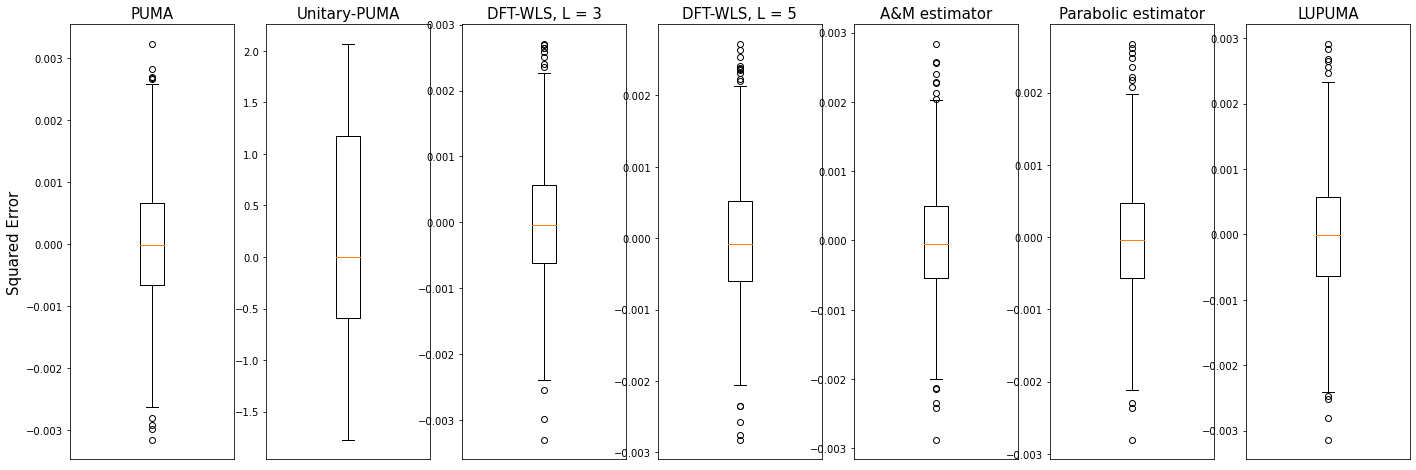

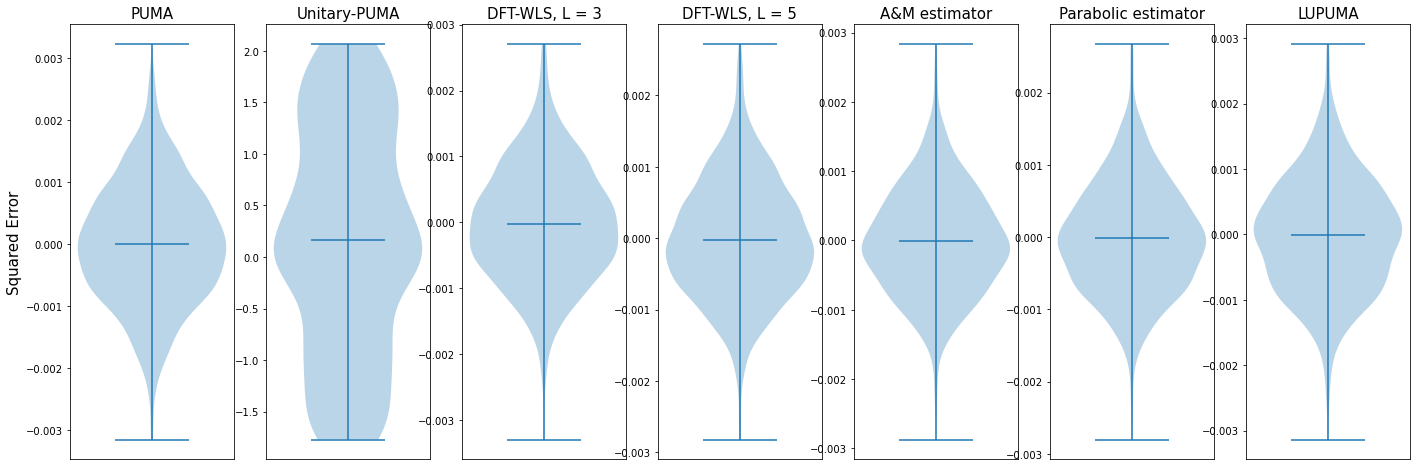

In [4]:
title_ls = ['PUMA', 'Unitary-PUMA', 'DFT-WLS, L = 3', 
            'DFT-WLS, L = 5', 'A&M estimator', 'Parabolic estimator', 'LUPUMA']
plt.figure(figsize = (24,8))
plt.tight_layout(pad = 5)
for i in range(7):
    plt.subplot(1,7,i+1)
    data = error_ls[i]
    plt.boxplot(data)
    plt.title(title_ls[i], fontsize = 15)
    plt.xticks([])
    if i == 0:
        plt.ylabel('Squared Error', fontsize = 15)
        
        
plt.figure(figsize = (24,8))
plt.tight_layout(pad = 5)
for i in range(7):
    plt.subplot(1,7,i+1)
    data = error_ls[i]
    plt.violinplot(data, showmeans=True, showmedians=False)
    plt.title(title_ls[i], fontsize = 15)
    plt.xticks([])
    if i == 0:
        plt.ylabel('Squared Error', fontsize = 15)

Here, we can observe that the proposed estimator has the best performance between all the subspace appraoches and similar performance to DFT-WLS and A&M.